In [37]:
import pandas as pd
import seaborn as sns

In [38]:
df = pd.read_csv("spotify2024.csv", encoding='ISO-8859-1')
df["YouTube Views"] = df["YouTube Views"].str.replace(',', '')
df["YouTube Views"] = pd.to_numeric(df["YouTube Views"], errors="coerce")
type(df.loc[0]["YouTube Views"])

numpy.float64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [40]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [41]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

In [42]:
months = {"Jan": 0, "Feb": 0, "Mar": 0, "Apr": 0, "May": 0, "Jun": 0, 
         "Jul": 0, "Aug": 0, "Sep": 0, "Oct": 0, "Nov": 0, "Dec": 0}
for date in df["Release Date"]:
    month = date.split("/")[0]
    if month == "1":
        months["Jan"] += 1
    elif month == "2":
        months["Feb"] += 1
    elif month == "3":
        months["Mar"] += 1
    elif month == "4":
        months["Apr"] += 1
    elif month == "5":
        months['May'] += 1
    elif month == "6":
        months["Jun"] += 1
    elif month == "7":
        months["Jul"] += 1
    elif month == "8":
        months["Aug"] += 1
    elif month == "9":
        months["Sep"] += 1
    elif month == "10":
        months["Oct"] += 1
    elif month == "11":
        months["Nov"] += 1
    elif month == "12":
        months["Dec"] += 1
months

{'Jan': 503,
 'Feb': 371,
 'Mar': 430,
 'Apr': 420,
 'May': 511,
 'Jun': 395,
 'Jul': 321,
 'Aug': 315,
 'Sep': 328,
 'Oct': 384,
 'Nov': 350,
 'Dec': 272}

<AxesSubplot:xlabel='Months', ylabel='Count'>

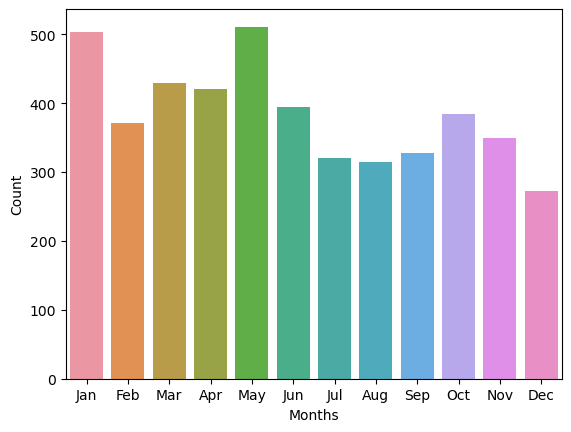

In [43]:
dates = {
    "Months": ["Jan","Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "Count": [months["Jan"], months["Feb"], months["Mar"], months["Apr"],months["May"], months["Jun"], months["Jul"], months["Aug"], months["Sep"], months["Oct"], months["Nov"], months["Dec"]]
}
dates = pd.DataFrame(dates)
sns.barplot(data=dates, x="Months", y="Count")

<AxesSubplot:xlabel='YouTube Views', ylabel='Count'>

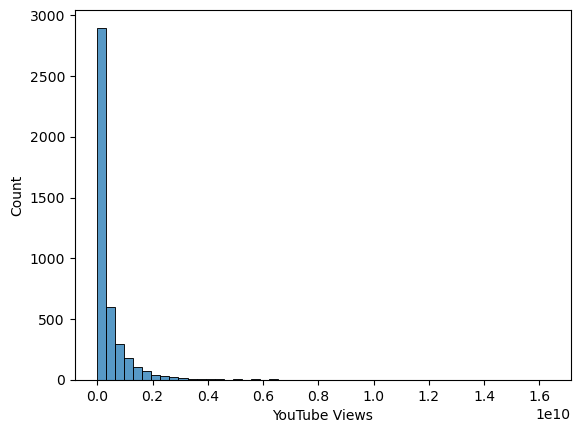

In [44]:
sns.histplot(data=df, x="YouTube Views", bins=50)

In [45]:
df["Shazam Counts"] = df["Shazam Counts"].str.replace(',', '')
df["Shazam Counts"] = pd.to_numeric(df["Shazam Counts"], errors="coerce")
type(df.loc[0]["Shazam Counts"])

numpy.float64

<AxesSubplot:xlabel='Shazam Counts', ylabel='Count'>

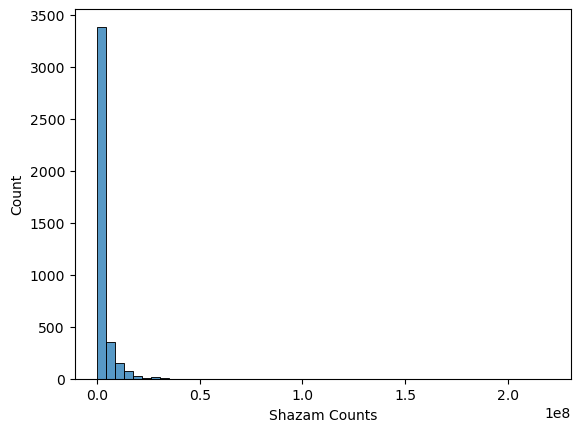

In [46]:
sns.histplot(data=df, x="Shazam Counts", bins=50)

In [47]:
df["Soundcloud Streams"] = df["Soundcloud Streams"].str.replace(',', '')
df["Soundcloud Streams"] = pd.to_numeric(df["Soundcloud Streams"], errors="coerce")
type(df.loc[0]["Soundcloud Streams"])

numpy.float64

<AxesSubplot:xlabel='Soundcloud Streams', ylabel='Count'>

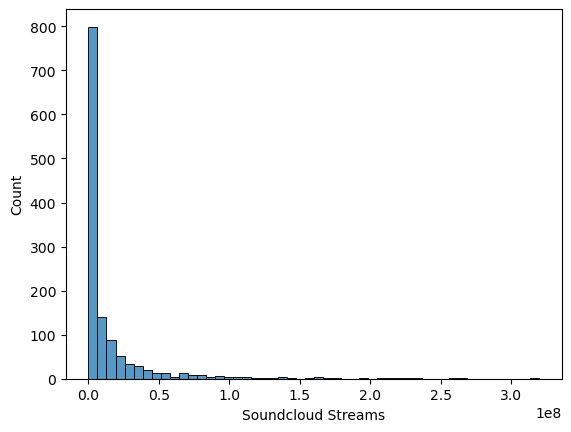

In [48]:
sns.histplot(data=df, x="Soundcloud Streams", bins=50)

In [49]:
df["All Time Rank"] = df["All Time Rank"].str.replace(',', '')
df["All Time Rank"] = pd.to_numeric(df["All Time Rank"], errors="coerce")
type(df.loc[0]["All Time Rank"])

numpy.int64

<AxesSubplot:xlabel='All Time Rank', ylabel='Count'>

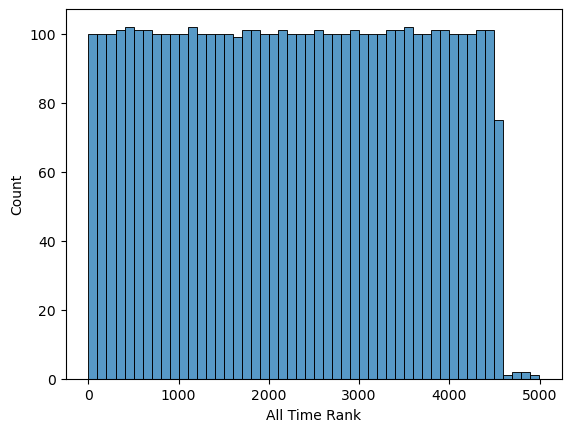

In [50]:
sns.histplot(data=df, x="All Time Rank", bins=50)

In [51]:
df["TikTok Likes"] = df["TikTok Likes"].str.replace(',', '')
df["TikTok Likes"] = pd.to_numeric(df["TikTok Likes"], errors="coerce")
type(df.loc[0]["TikTok Likes"])

numpy.float64

<AxesSubplot:xlabel='TikTok Likes', ylabel='Count'>

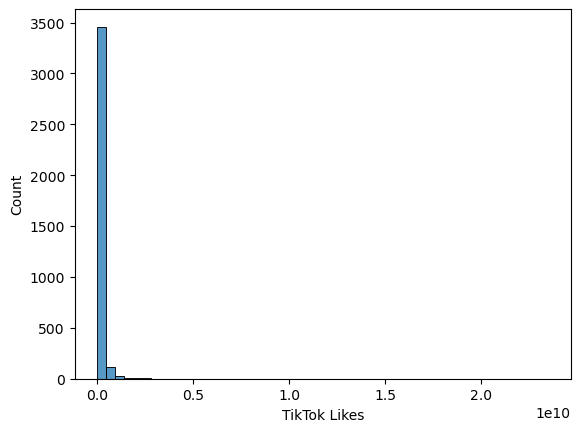

In [52]:
sns.histplot(data=df, x="TikTok Likes", bins=50)

In [53]:
df["TikTok Likes"] = df["TikTok Likes"].str.replace(',', '')
df["TikTok Likes"] = pd.to_numeric(df["TikTok Likes"], errors="coerce")
type(df.loc[0]["TikTok Likes"])

AttributeError: Can only use .str accessor with string values!

In [55]:
df["TikTok Views"] = df["TikTok Views"].str.replace(',', '')
df["TikTok Views"] = pd.to_numeric(df["TikTok Views"], errors="coerce")
type(df.loc[0]["TikTok Views"])

numpy.float64

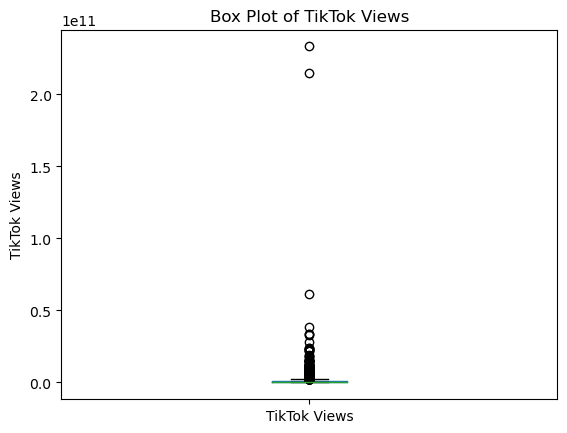

In [56]:
df.boxplot(column='TikTok Views', grid=False)
plt.title('Box Plot of TikTok Views')
plt.ylabel('TikTok Views')
plt.show()

#The Box Plot displayed shows that the amount of TikTok Views was at its highest between 0.0 and 0.5.

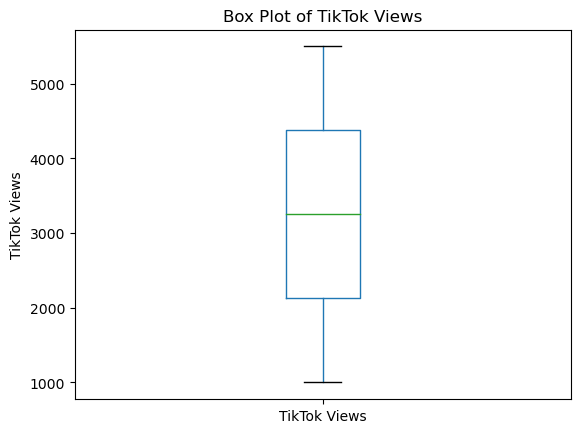

Min: 1000.0
Q1 (25th percentile): 2125.0
Median (50th percentile): 3250.0
Q3 (75th percentile): 4375.0
Max: 5500.0


In [57]:
df = pd.DataFrame({
    'TikTok Views': [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]
})

df.boxplot(column='TikTok Views', grid=False)
plt.title('Box Plot of TikTok Views')
plt.ylabel('TikTok Views')
plt.show()

summary_stats = df["TikTok Views"].describe()
min_value = summary_stats['min']
q1 = summary_stats['25%']
median = summary_stats['50%']
q3 = summary_stats['75%']
max_value = summary_stats['max']

print(f"Min: {min_value}")
print(f"Q1 (25th percentile): {q1}")
print(f"Median (50th percentile): {median}")
print(f"Q3 (75th percentile): {q3}")
print(f"Max: {max_value}")

#The minimum was at 1000 views. Q1 was at 2125 views, the median at 3250 views, the Q3 at 4375 views, and the max at 5500 views. The views ranged from just above 2000 to just above 4000 views.

Min: 100000
Q1 (25th percentile): 212500.0
Median (50th percentile): 350000.0
Q3 (75th percentile): 575000.0
Max: 800000


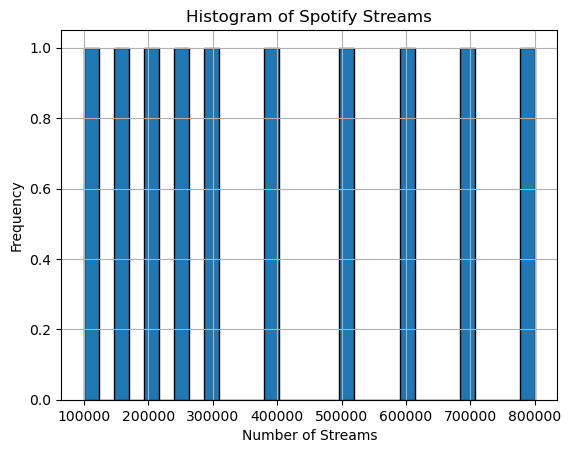

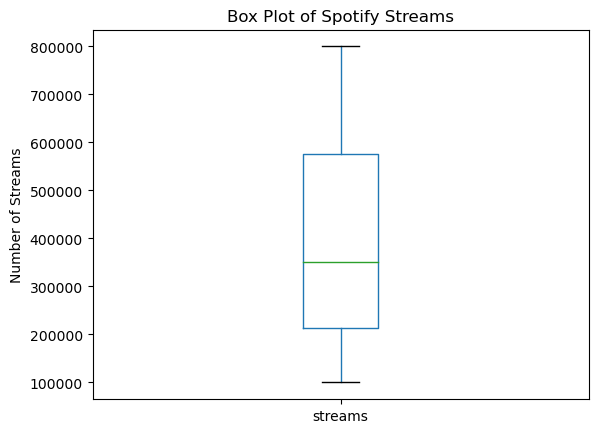

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'streams': [10000, 50000, 100000, 500000, 1000000, 10000000, 100000000, 1000000000]
})

min_value = df['streams'].min()
q1 = df['streams'].quantile(0.25)
median = df['streams'].median()
q3 = df['streams'].quantile(0.75)
max_value = df['streams'].max()

print(f"Min: {min_value}")
print(f"Q1 (25th percentile): {q1}")
print(f"Median (50th percentile): {median}")
print(f"Q3 (75th percentile): {q3}")
print(f"Max: {max_value}")

Min: 10000
Q1 (25th percentile): 87500.0
Median (50th percentile): 750000.0
Q3 (75th percentile): 32500000.0
Max: 1000000000
